In [1]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline


import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import numpy as np
from models.resnet import ResNet
from models.unet import UNet
from models.skip import skip
import torch
import torch.optim

from torch.autograd import Variable
from utils.inpainting_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

PLOT = True
imsize=-1
dim_div_by = 64
dtype = torch.cuda.FloatTensor

(150, 250, 3)


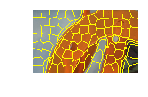

In [30]:
image = cv2.imread('data/inpainting/9_col.png')
image2= cv2.imread('data/inpainting/6.png')
print(image.shape)
height, width, depth = image.shape
dpi = 80
    
figsize=height/float(dpi) ,width/float(dpi)
cv2_im = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = Image.fromarray(cv2_im) 
image=np.array(image)
segments = slic((image), n_segments = 100, sigma = 5)
#show the output of SLIC
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img_as_float(image), segments))
#ax.imshow(mark_boundaries(img_as_float(image2), segments))
plt.axis("off")
plt.show()

In [57]:
n_seg=np.size(np.unique(segments))
print(np.shape(segments),n_seg)
segments.item((123,24))

(150, 250) 92


77

In [74]:
# load the image, convert it to grayscale, and blur it
image1 = cv2.imread('data/inpainting/9_col.png')
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
cv2.imshow('image2',blurred)

In [61]:
def bel_seg(a,b):                           ##returns segment it belongs to
    x=segments.item((a,b))
    return x

r=segments.item((123,24))                  #arbitrary input
m=np.argwhere(segments==r)                 #list of indices of the same segment
#print(m)
seg=np.zeros(n_seg)                        #list to store count of neighbor segment no
#print(m[0,0],m[0,1],seg[bel_seg(112,17)])
seg[bel_seg(m[0,0],m[0,1])-1]+=1
prevx=firstx=m[0,0]
for p in range(1,m.shape[0]):
    #print(m[p,0],m[p,1])
    a=m[p,0]
    b=m[p,1]
    
    if a==firstx:
        seg[bel_seg(a-1,b)]+=1
    if m[p,0]!=prevx:
        seg[bel_seg(a,b-1)]+=1
        print(bel_seg(a,b-1))
        if(bel_seg(a-1,b)!=r):
            seg[bel(a-1,b)]+=1
        seg[bel_seg(m[p-1,0],m[p-1,1]+1)]+=1
        print(bel_seg(m[p-1,0],m[p-1,1]+1))
        prevx=m[p,0]
        #print('                ',prevx)
seg[bel_seg(m[p-1,0],m[p-1,1])]+=1
print(seg)        
    
    
    
'''for p in range(image.shape[0]):
        for q in range(image.shape[1]):
            r=segments.item((p,q))
            
            m=np.argwhere(segments==r)
            #print(m[0,0], m[0,1])'''

63
64
63
64
76
64
76
64
76
64
76
64
76
64
76
64
76
64
76
78
76
78
76
78
76
78
76
78
76
78
89
78
89
78
89
78
89
78
89
78
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   2.   9.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  14.   1.  11.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.
   0.   0.]


'for p in range(image.shape[0]):\n        for q in range(image.shape[1]):\n            r=segments.item((p,q))\n            \n            m=np.argwhere(segments==r)\n            #print(m[0,0], m[0,1])'

In [4]:
cnt=0
for a in range(np.shape(segments)[0]):
    for b in range(np.shape(segments)[1]):
        if(segments.item(a,b)==10):
            cnt=cnt+1
#print(cnt)
            
            

1372


# Import image

In [5]:
img_path  = 'data/inpainting/6.png'
mask_path = 'data/inpainting/6_mask_dil.png'
col_path  = 'data/inpainting/6_col.png'

img_pil, img_np = get_image(img_path, imsize)

img_mask_pil, img_mask_np = get_image(mask_path, imsize)

img_col_pil, img_col_np=get_image(col_path,imsize)

#img_pil=np.asarray(img_pil)
img_mask_pil = crop_image(img_mask_pil, dim_div_by)
img_pil      = crop_image(img_pil,      dim_div_by)

img_col_pil  = crop_image(img_col_pil, dim_div_by)

#img_pil=np.asarray(img_pil)
img_np      = pil_to_np(img_pil)
img_mask_np = pil_to_np(img_mask_pil)

img_col_np  = pil_to_np(img_col_pil)

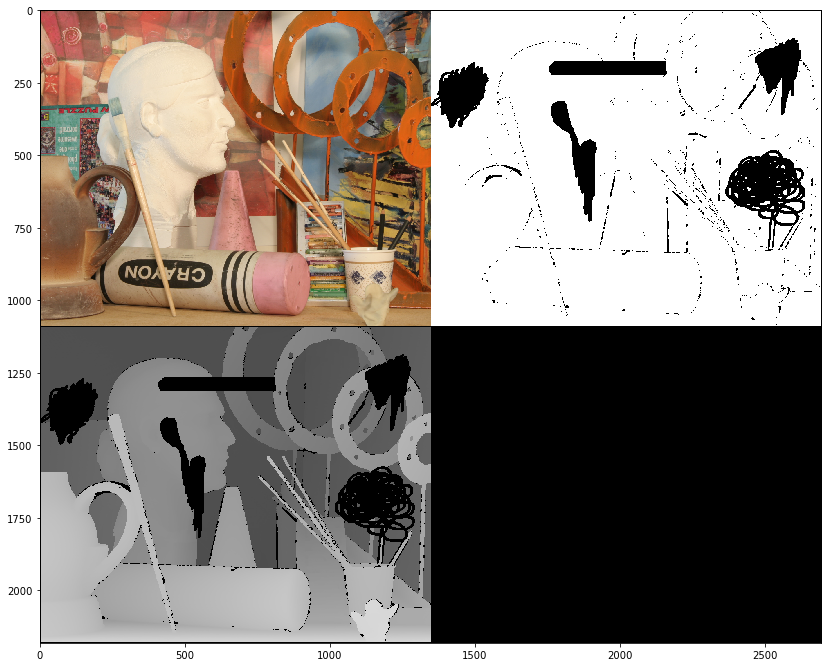

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.50588238, ...,  1.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.8392157 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.28235295, ...,  1.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.8392157 , ...,

In [7]:
#img_mask_var=np_to_var(img_mask_np).type(dtype)
img_var = np_to_var(img_np).type(dtype)    #img_np
mask_var = np_to_var(img_mask_np).type(dtype)
plot_image_grid([img_col_np, img_mask_np, img_mask_np*img_np],2,11)

In [21]:
def superpixel(inp, out):
    [c,a,b]=img_mask_np.shape
    #print(img_mask_np.size)
    avg=0
    for p in range(inp.size()[0]):
        for q in range(inp.size()[1]):
            x=inp[0,p,q]
            #if(img_mask_np[0,p,q]==0):

            segVal=segments.item(p,q)
            #mask=np.zeros(image.shape[:2], dtype="uint8")
            m=np.argwhere(segments == segVal)
            #print(m)
            #x=img_np[0,p,q]
            #print(m[0][0])
            s=0
            for r in range(m.shape[0]):
                #print(m.shape)
                #print(m[r][0],m[r][1])
                y=out[0,m[r][0],m[r][1]]
                s=s+(x-y)**2
            avg=avg+s/float(m.shape[0])
            #else :
            #y=
    return avg


In [22]:
net_input = Variable(torch.randn(50, 50), requires_grad=True)
print(net_input)
target = Variable(torch.randn(50, 50))
print(target)

loss1=[]
for i in range(5):

    loss = torch.mean(superpixel(net_input,target))
    #print(loss)
    loss.backward()
    net_input.data.add_(-0.0001 * net_input.grad.data)
    net_input.grad.data.zero_()
    #if loss.data[0] < 1e-3:
     #   break
    loss1.append(loss.data[0])
#plt.plot(range(5000), loss1)

Variable containing:
-0.7248 -0.0010  0.3960  ...  -1.2031  0.8947 -0.3513
 0.5533  1.3486  0.4934  ...   0.4962  1.9987  1.1817
-0.5333 -0.5306 -0.4583  ...   0.7634  0.9447  0.6974
          ...             ⋱             ...          
 0.9998 -1.5114 -0.1378  ...   0.6688 -0.2222 -0.3835
-0.4850 -0.2101 -0.4131  ...   0.5858 -0.0627 -0.9943
 1.3296 -1.5453 -0.8351  ...  -0.7471  1.3581 -0.0119
[torch.FloatTensor of size 50x50]

Variable containing:
 0.6608  1.9139  0.3726  ...  -1.8460  0.2576  0.6129
 1.2908 -0.6486 -1.6299  ...  -0.7473 -1.1818  0.1122
-0.4308 -0.9792 -0.9647  ...  -0.0318 -0.4112  0.8079
          ...             ⋱             ...          
 2.1814 -1.0087 -0.0675  ...   1.3591  1.3109 -0.8964
 1.4212 -0.7386 -0.0568  ...   0.6196 -0.5226  0.7534
-0.8365 -0.1722  0.4462  ...  -0.1246  0.7798 -0.5510
[torch.FloatTensor of size 50x50]



IndexError: index 50 is out of range for dimension 0 (of size 50)